In [1]:
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 
import tensorflow as tf
%matplotlib inline

In [2]:
data = pd.read_csv("Iris.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [3]:
x = data.drop(["Id","Species"],axis = 1)
y = data.Species

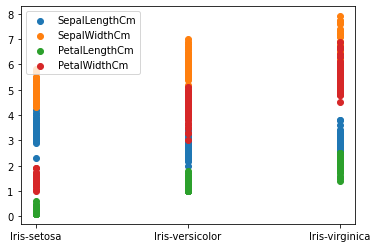

In [4]:
plt.scatter(y,x["SepalWidthCm"])
plt.scatter(y,x["SepalLengthCm"])
plt.scatter(y,x["PetalWidthCm"])
plt.scatter(y,x["PetalLengthCm"])
plt.legend(x)

{'whiskers': [<matplotlib.lines.Line2D at 0x22ea080dfd0>,
 'caps': [<matplotlib.lines.Line2D at 0x22ea081f670>,
 'boxes': [<matplotlib.lines.Line2D at 0x22ea080dd90>],
 'medians': [<matplotlib.lines.Line2D at 0x22ea081fb50>],
 'fliers': [<matplotlib.lines.Line2D at 0x22ea081fe20>],
 'means': []}

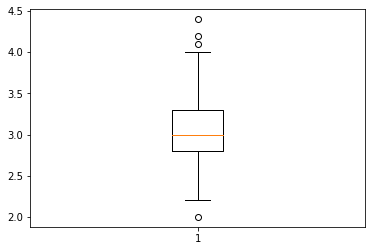

In [5]:
plt.boxplot(x.SepalWidthCm)

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
label = encoder.fit_transform(y)
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
outliers = []
out_ind = []
def detect_outliers_iqr(d):
    q1 = np.percentile(d, 25)
    q3 = np.percentile(d, 75)
    #print(q1,q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    #print(lwr_bound,upr_bound)
    count = -1
    for i in d: 
        count += 1
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
            out_ind.append(count)
    return outliers
d_outlier = detect_outliers_iqr(x.SepalWidthCm)
out_ind


[15, 32, 33, 60]

In [8]:
tenth_percentile = np.percentile(np.sort(x.SepalWidthCm), 10)
ninetieth_percentile = np.percentile(np.sort(x.SepalWidthCm), 90)
#print(tenth_percentile, ninetieth_percentile)
x.SepalWidthCm = np.where(x.SepalWidthCm<tenth_percentile, tenth_percentile, x.SepalWidthCm)
x.SepalWidthCm = np.where(x.SepalWidthCm>ninetieth_percentile, ninetieth_percentile, x.SepalWidthCm)
for i in out_ind:
    print(x.SepalWidthCm[i])




3.6099999999999994
3.6099999999999994
3.6099999999999994
2.5


In [9]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,label, train_size=0.8 , random_state=42 , shuffle=True,stratify=y)


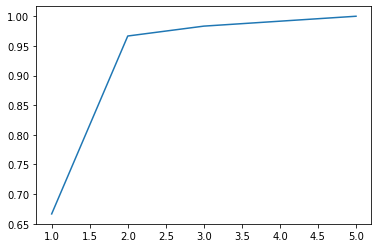

In [10]:
from sklearn import tree
scores = []
for i in range (1,6):
    tree_clf = tree.DecisionTreeClassifier(max_depth=i)
    tree_clf.fit(x_train,y_train)
    tree_predictions = tree_clf.predict(x_train)
    scores.append(sklearn.metrics.accuracy_score(y_train,tree_predictions))
plt.plot(range(1,6),scores)


In [15]:
tree_clf = tree.DecisionTreeClassifier(max_depth=3 )
tree_clf.fit(x_train,y_train)
tree_predictions = tree_clf.predict(x_train)
sklearn.metrics.accuracy_score(y_train,tree_predictions)

0.9833333333333333

[[40  0  0]
 [ 0 38  2]
 [ 0  0 40]]


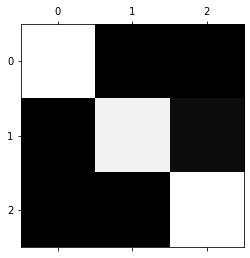

In [16]:
from sklearn.metrics import confusion_matrix,classification_report
tree_cm = confusion_matrix(y_train , tree_predictions)
print(tree_cm)
plt.matshow(tree_cm, cmap=plt.cm.gray)
plt.show()
tree_cr = classification_report(y_train , tree_predictions, output_dict = True )

In [17]:
tree_clf.fit(x_test,y_test)
y_pred = tree_clf.predict(x_test)
print(y_pred,y_test)
sklearn.metrics.accuracy_score(y_test,y_pred)

[0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 2 2 1 1 0 2 0] [0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 2 2 1 1 0 2 0]


1.0

In [14]:
# model = tf.keras.Sequential([
#   tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),
#   tf.keras.layers.Dense(10, activation=tf.nn.relu),
#   tf.keras.layers.Dense(3)
# ])
# x_train = x_train.to_numpy()
# predictions = model(x_train)
# tf.nn.softmax(predictions[:5])
# print("Prediction: {}".format(tf.argmax(predictions[:5], axis=1)))
# print("    Labels: {}".format(y_train[:5]))
# loss_fxn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# def loss(model,x,y,training):
#     loss_model = model(x_train , training)
#     return  loss_fxn(y_true = y_train , y_pred = loss_model)

# #loss_val = loss(model , x_train, y_train, training = False)


# #print("Loss test: {}".format(loss_val))
# def grad(model , x ,y):
#     with tf.GradientTape() as tape:
#         loss_val = loss(model , x, y, training = True)
#     return loss_val,tape.gradient(loss_val,model.trainable_variables)
# optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
# loss_value, grads = grad(model,x_train , y_train)

# print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),
#                                           loss_value.numpy()))

# optimizer.apply_gradients(zip(grads, model.trainable_variables))

# print("Step: {},         Loss: {}".format(optimizer.iterations.numpy(),
#                                           loss(model, x_train, y_train, training=True).numpy()))